In [1]:
# 1️⃣ Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/Users/bhawyagulati/Documents/Python Project/employee_attrition_ - employee_attrition_impure.csv.csv")
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

Dataset Shape: (200, 6)

Sample Data:
    MonthlyIncome   Age  JobSatisfaction  YearsAtCompany OverTime  Attrition
0        13191.0  41.0              4.0             1.0      Yes        1.0
1        15859.0  44.0              4.0            17.0      Yes        0.0
2         9014.0  28.0              1.0             NaN       No        NaN
3         4936.0   NaN              1.0             NaN       No        NaN
4         3885.0  27.0              4.0             0.0      Yes        1.0


In [4]:
# 3️⃣ Separate Features (X) and Target (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [5]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [6]:
num_imputer = SimpleImputer(strategy="mean")
X[num_cols] = num_imputer.fit_transform(X[num_cols])


In [7]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le



In [8]:
y = SimpleImputer(strategy="most_frequent").fit_transform(y.values.reshape(-1, 1)).ravel()


In [9]:
y = y.astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(X_test)


In [13]:
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



✅ Model Accuracy: 0.425

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.46      0.62      0.53        21
           3       0.00      0.00      0.00         1

    accuracy                           0.42        40
   macro avg       0.28      0.28      0.27        40
weighted avg       0.41      0.42      0.40        40


📌 Confusion Matrix:
 [[ 4 14  0]
 [ 7 13  1]
 [ 0  1  0]]


Matplotlib is building the font cache; this may take a moment.


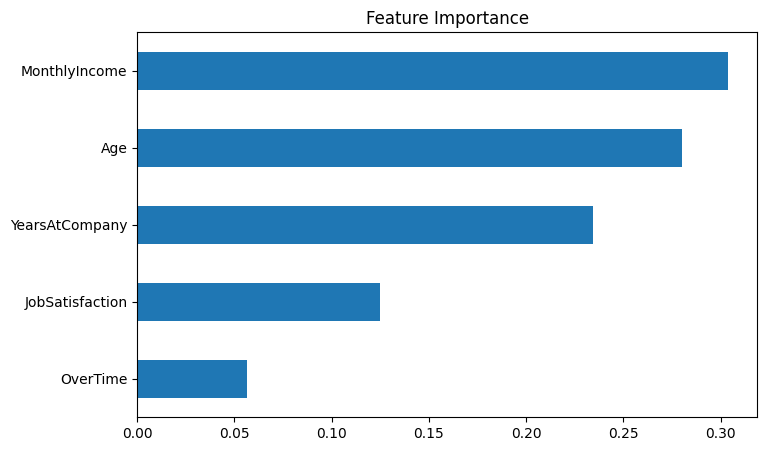

In [14]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance")
plt.show()